In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_and_visualize_pkl(file_path, columns_to_visualize=None):
    # Cargar el archivo pickle
    df = pd.read_pickle(file_path)
    
    print(df.dtypes)
    # Mostrar las primeras filas del DataFrame
    print("Primeras filas del DataFrame:")
    print(df.head())
    
    # Mostrar la información del DataFrame
    print("\nInformación del DataFrame:")
    print(df.info())
    
    # Descripción estadística del DataFrame
    print("\nDescripción estadística del DataFrame:")
    print(df.describe())
    
    # Seleccionar las columnas numéricas o las especificadas por el usuario
    if columns_to_visualize:
        numeric_columns = columns_to_visualize
    else:
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Limitar la cantidad de columnas a visualizar para evitar el error de diseño
    max_columns = 100000
    if len(numeric_columns) > max_columns:
        print(f"\nMostrando solo las primeras {max_columns} columnas numéricas:")
        numeric_columns = numeric_columns[:max_columns]
    
    # Histogramas de las características numéricas seleccionadas
    df[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, len(numeric_columns)//2))
    plt.tight_layout()
    plt.show()
    
    # Correlación entre las características numéricas seleccionadas
    corr = df[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    
    return df

Age1         float64
Age2         float64
Age3         float64
Age4         float64
Gender1      float64
Gender2      float64
Country1     float64
Country2     float64
Country3     float64
Country4     float64
Country5     float64
Country6     float64
Country7     float64
Country8     float64
Country9     float64
Country10    float64
Country11    float64
Country12    float64
Country13    float64
Country14    float64
Country15    float64
Country16    float64
Country17    float64
Country18    float64
PR           float64
CD           float64
CC           float64
CB           float64
LC           float64
AND          float64
dtype: object
Primeras filas del DataFrame:
   Age1  Age2  Age3  Age4  Gender1  Gender2  Country1  Country2  Country3  \
0   0.0   1.0   0.0   0.0      0.0      1.0       0.0       0.0       0.0   
1   1.0   0.0   0.0   0.0      0.0      1.0       0.0       0.0       0.0   
2   0.0   0.0   1.0   0.0      1.0      0.0       0.0       0.0       0.0   
3   0.0   0.0   1.

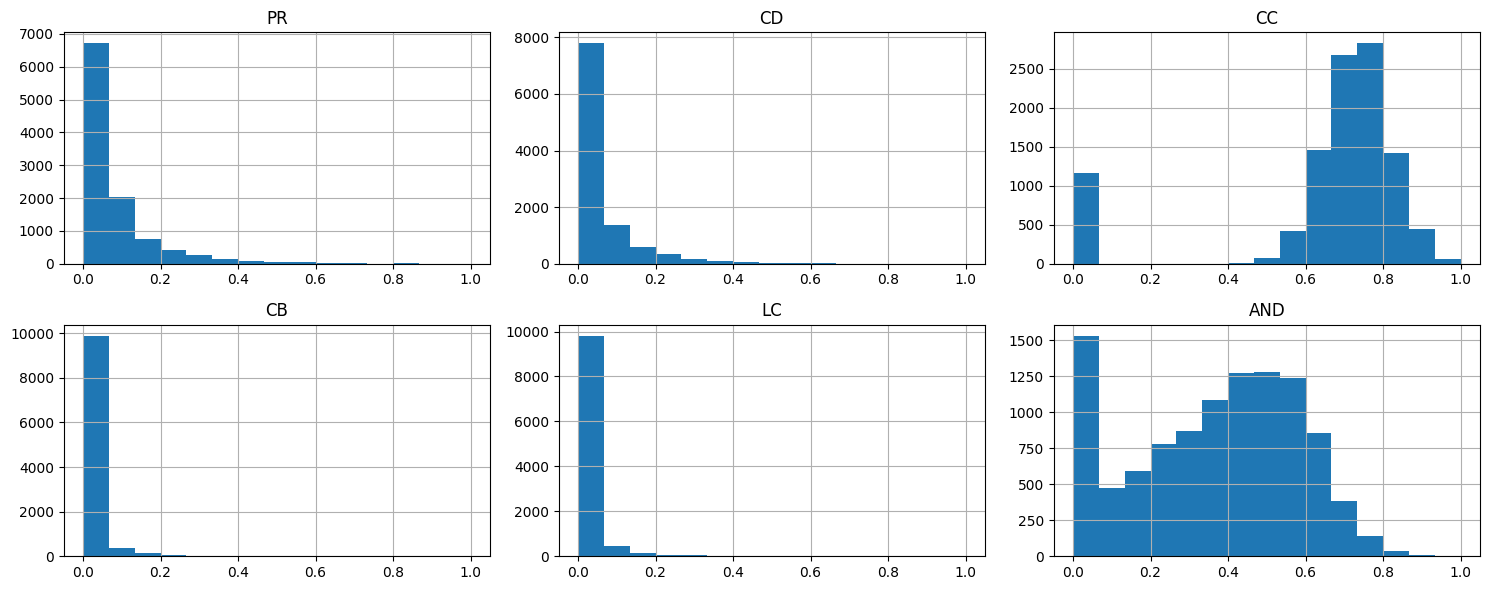

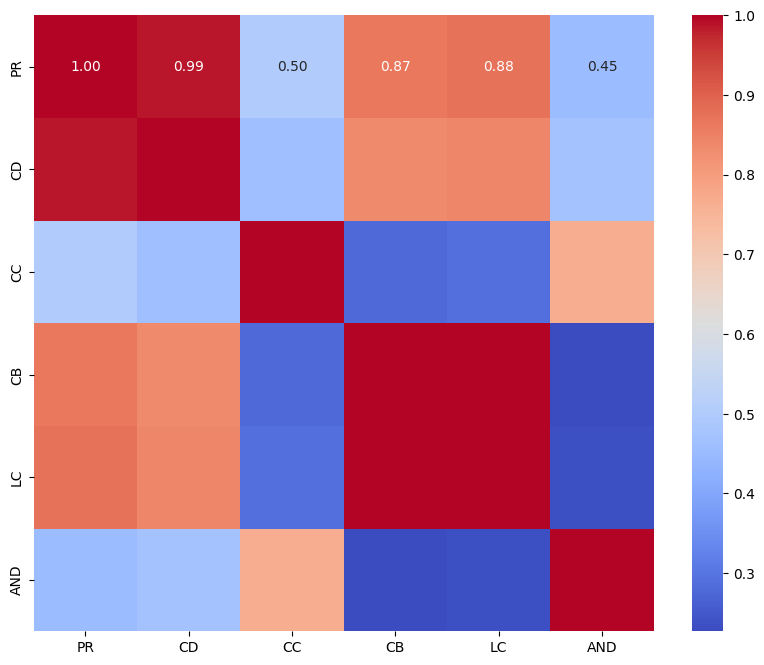

In [3]:
file_path = "data_wines/x_train_alpha(0.002).pkl"  # Reemplaza con la ruta a tu archivo .pkl
columns_to_visualize = ['PR', 'CD', 'CC', 'CB', 'LC', 'AND']  # Especifica las columnas que quieres visualizar
df = load_and_visualize_pkl(file_path, columns_to_visualize)

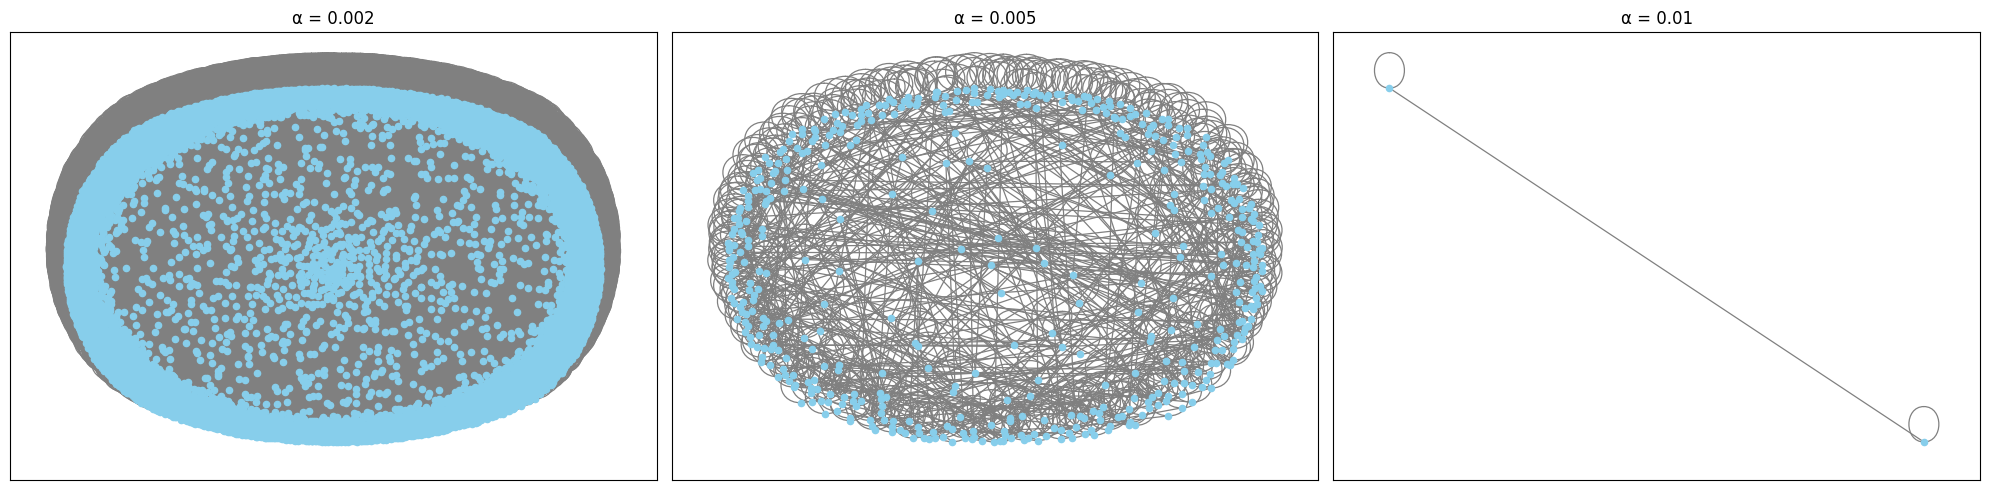

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Valores de alpha que deseas visualizar
alpha_coefs = [0.002, 0.005, 0.01]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(alpha_coefs), figsize=(20, 5))

# Iterar sobre los valores de alpha y sus correspondientes subplots
for i, alpha_coef in enumerate(alpha_coefs):
    try:
        with open(f"data_wines/graph_alpha_{alpha_coef}.pkl", "rb") as f:
            G = pickle.load(f)
        
        # Elegir el layout
        pos = nx.spring_layout(G, k=0.9)  # Ajustar el parámetro k para mejorar el espaciado

        # Dibujar nodos
        nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue', ax=axes[i])

        # Dibujar aristas
        nx.draw_networkx_edges(G, pos, width=0.9, edge_color='gray', ax=axes[i])

        # Títulos de los subplots
        axes[i].set_title(f"α = {alpha_coef}")

    except Exception as e:
        print(f"Error al cargar o dibujar el grafo para alpha {alpha_coef}: {e}")
        continue

# Ajustar la disposición de los subplots
plt.tight_layout()
plt.show()
